<a href="https://colab.research.google.com/github/ZakiArfa/uas-data-mining/blob/main/uas%20data%20mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yellowbrick

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import warnings; warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
df["Customer_For"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days
df["Age"] = 2021 - df["Year_Birth"]
df["Spent"] = df[[
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]].sum(axis=1)
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Family_Size"] = df["Children"] + df["Marital_Status"].replace({
    "Single": 1, "Married": 2, "Together": 2, "Divorced": 1, "Widow": 1, "Alone": 1, "Absurd": 1, "YOLO": 1
}).fillna(1).astype(int)

In [ ]:
df.drop(["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate", "2n Cycle": "Undergraduate",
    "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"
})

cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])

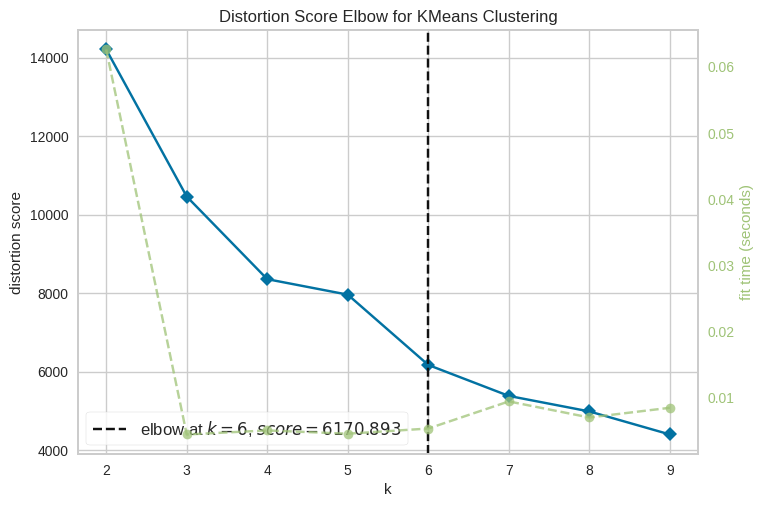

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(pca_df)
visualizer.show()

In [ ]:
ac = AgglomerativeClustering(n_clusters=4)
clusters = ac.fit_predict(pca_df)
df["Cluster"] = clusters


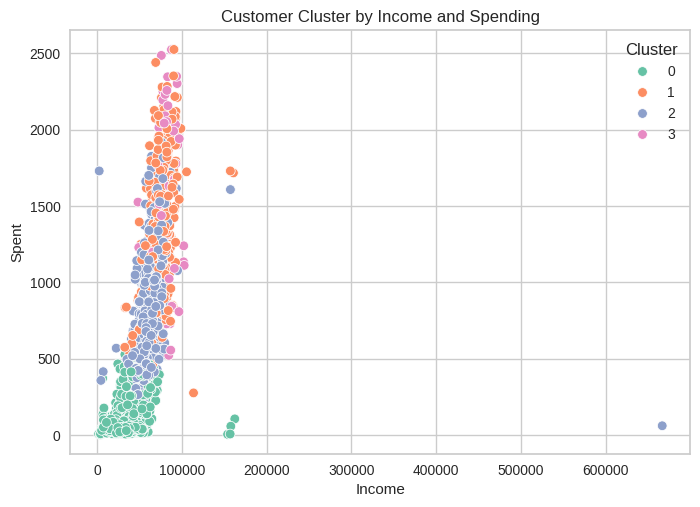

In [ ]:
sns.scatterplot(x=df["Income"], y=df["Spent"], hue=df["Cluster"], palette="Set2")
plt.title("Customer Cluster by Income and Spending")
plt.show()


In [ ]:
df.groupby("Cluster")[["Income", "Spent", "Age", "Family_Size"]].mean()


,Income,Spent,Age,Family_Size
Cluster,,,,
0,35842.555147,113.493566,49.777574,2.878676
1,75599.597190,1362.018735,52.922717,1.622951
2,61429.795563,831.477021,56.083994,2.849445
3,81999.714286,1650.771429,49.785714,1.742857
